## MultiClass Logistic Regression : 

Best threshold değeri bulunurken default değerler ile belirlenen logistic regression modeli kullanılır. ayrıca train data seti üzerinden bulunmalıdır. Bunu yaptığımız zaman aradığımız skoru öne çıkarır, ama precision ve recall arasında en dengeli skor istenirse best threshold aramaya gerek yoktur. 

Sklearn de target sutununda categoric için object olarak kalmasına izin verebilir. Burda target değerlerine numeric değişken atamadan yapacağız. Numerice çevrilip futureler arasında korelasyon kıyaslaması yapılamaz. Bu datamızda target sayımız 2 den fazladır. target sutunuda ki class sayımız 2 den fazla ise multiclass durumu var denir.

#### Not : 2 den fazla class değeri varsa best threshold değeri aranmaz!!!

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv('iris.csv')
df.head()
# 3 tane farklı bitkiye ait setosa versicolor virginica ya ait uzunluk ve genişlik değerleri var.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


In [4]:
df.species.value_counts()
# 3 tane classımız var.

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().T
# değerler arasında farklar çok az outlier yok ve scale edilmeye gerek yok. ama istenirse uygulanabilir.

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.000,5.843,0.828,4.300,5.100,5.800,6.400,7.900
sepal_width,150.000,3.057,0.436,2.000,2.800,3.000,3.300,4.400
petal_length,150.000,3.758,1.765,1.000,1.600,4.350,5.100,6.900
petal_width,150.000,1.199,0.762,0.100,0.300,1.300,1.800,2.500


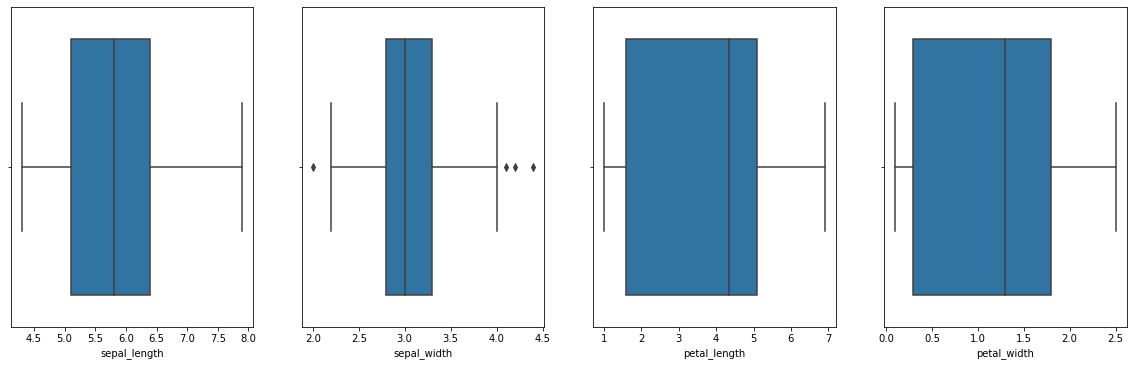

In [10]:
index = 0
plt.figure(figsize=(20,20))
for i in df.select_dtypes([float, int]).columns:
    index += 1
    plt.subplot(3,4,index)
    sns.boxplot(df.select_dtypes([float, int])[i], whis=1.5)

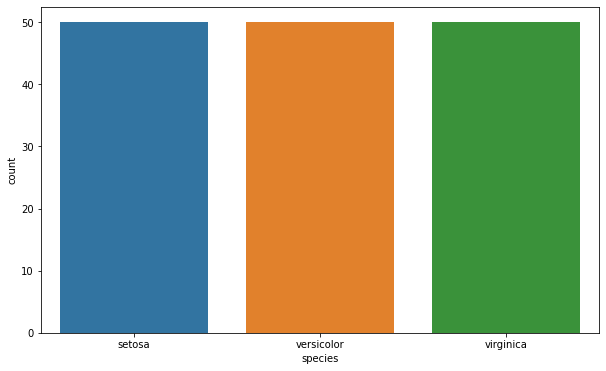

In [7]:
sns.countplot(df["species"]);

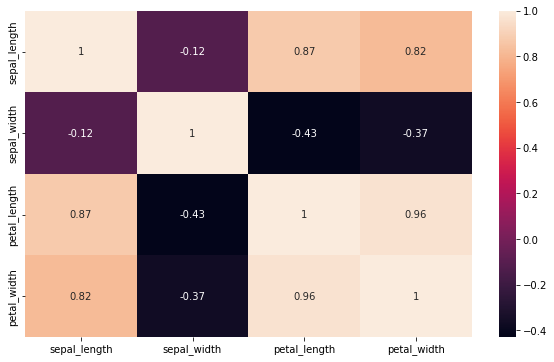

In [11]:
sns.heatmap(df.corr(),annot=True);

In [12]:
multi = df.corr()
multi[(multi != 1) & (multi > 0.7)]

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,NaN,NaN,0.872,0.818
sepal_width,NaN,NaN,NaN,NaN
petal_length,0.872,NaN,NaN,0.963
petal_width,0.818,NaN,0.963,NaN


In [21]:
df.corr()["species"].drop("species").sort_values()

KeyError: 'species'

### Train Test Spilt and default modelling :

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
X = df.drop("species", axis=1)
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

### Error Metrics :

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

In [17]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

In [19]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Train_Set
[[40  0  0]
 [ 0 36  2]
 [ 0  2 40]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.95      0.95        38
   virginica       0.95      0.95      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




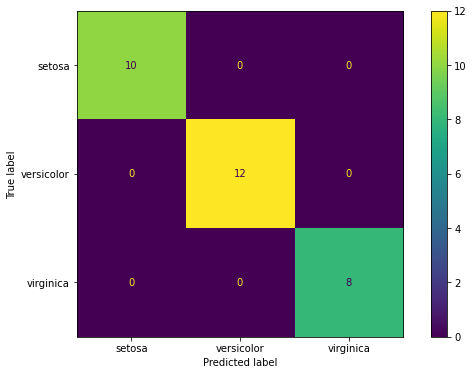

In [24]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_model, X_test, y_test);
# hepsini doğru bilmiş.

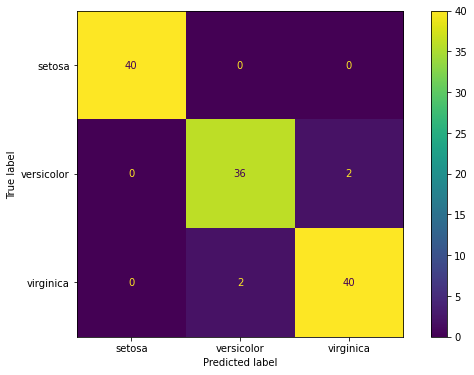

In [26]:
plot_confusion_matrix(log_model, X_train, y_train);

# setosa da 40 tahmin yapmış ve hepsini bilmiş,
# versicolorda 38 tahmin yapmış ve 36 sı doğru 2 si virginica olarak bilinmiş,
# virginica için 42 tane tahminleme de bulunmuş, 40 tanesi doğru, 2 tanesi versicolor olarak bilmiş.

### Cross validate ile skorları kontrol edelim : 

In [30]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores_train = cross_validate(model, X_train, y_train, scoring=["accuracy", "precision_weighted", "recall_weighted", 
                                                                "f1_weighted"], cv= 10)
# eğer class sayımız 2 den fazla ise weighted ile yazılır.

model2 = LogisticRegression()

scores_test = cross_validate(model2, X_test, y_test, scoring=["accuracy", "precision_weighted", "recall_weighted", 
                                                                "f1_weighted"], cv = 10)

df_scores_train = pd.DataFrame(scores_train, index = range(1,11))
df_scores_test = pd.DataFrame(scores_test, index = range(1,11))

train_scores = df_scores_train.mean()[2:]
test_scores = df_scores_test.mean()[2:]

print("train seti için yaptığımız cross validate skor kontrolü = ")
print(train_scores)
print("************")
print("test seti için yaptığımız cross validate skor kontrolü = ")
print(test_scores)

train seti için yaptığımız cross validate skor kontrolü = 
test_accuracy             0.942
test_precision_weighted   0.953
test_recall_weighted      0.942
test_f1_weighted          0.941
dtype: float64
************
test seti için yaptığımız cross validate skor kontrolü = 
test_accuracy             1.000
test_precision_weighted   1.000
test_recall_weighted      1.000
test_f1_weighted          1.000
dtype: float64


### Not : istersek targetta ki her class değerimiz için skorlara bakabiliriz : 

In [31]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

#### Örneğin versicolor class değerinin skorlarına bakalım : 
#### pos_label yerine labels var, average binary değil None olacak!!!

In [38]:
# örneğin versicolorun test seti için f1 skoruna bakalım : 

f1_score(y_test, y_pred, average = None, labels=["versicolor"])
# f1 skoru 1.0 imiş.

array([1.])

In [39]:
# setosanın precision skoruna bakalım : 
precision_score(y_test, y_pred, average=None, labels = ["setosa"])
# setosanın test datası için precision skoru 1.0 imiş.

array([1.])

### Örneğin versicolorun cross validate ile skorlarını kontrol edelim : 

In [42]:
f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"])
precision_versicolor = make_scorer(precision_score, average = None, labels =["versicolor"])
recall_versicolor = make_scorer(recall_score, average = None, labels =["versicolor"])

model = LogisticRegression()

scores = cross_validate(model, X_test, y_test, scoring = {"f1_versicolor":f1_versicolor, 
                                                                   "precision_versicolor":precision_versicolor,
                                                                   "recall_versicolor":recall_versicolor}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# test için 1.0 skorlarımız versicolor için doğru.

test_f1_versicolor          1.000
test_precision_versicolor   1.000
test_recall_versicolor      1.000
dtype: float64

### Grid_SearchCV Best params : 

In [48]:
# penalty='l2', C=1.0, class_weight=None, solver='lbfgs'

from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 100)
class_weight= ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall_weighted", 
                          n_jobs = -1)

grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 1.14975700e-01, 1.32194115e-01, 1.51991108e-01,
       1.74752840e-01, 2.00923300e-01, 2.31012970e-01, 2.65608778e-01,
       3.05385551e-01, 3.51119173e-01, 4.03701726e-01, 4.64158883e-01,
       5.33669923e-01, 6.13590727e-01, 7.05480231e-01, 8.11130831e-01,
       9.32603347e-01, 1.07226722e+...
       1.23284674e+04, 1.41747416e+04, 1.62975083e+04, 1.87381742e+04,
       2.15443469e+04, 2.47707636e+04, 2.84803587e+04, 3.27454916e+04,
       3.76493581e+04, 4.32876128e+04, 4.97702356e+04, 5.72236766e+04,
       6.57933225e+04, 7.56463328e+04, 8.69749003e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall_weighted')

In [49]:
grid_model.best_params_

{'C': 0.26560877829466867,
 'class_weight': 'balanced',
 'penalty': 'l1',
 'solver': 'saga'}

In [50]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[40  0  0]
 [ 0 36  2]
 [ 0  0 42]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      0.95      0.97        38
   virginica       0.95      1.00      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




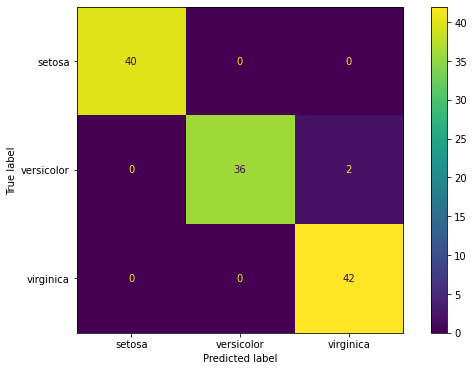

In [52]:
plot_confusion_matrix(grid_model, X_train, y_train);
# grid_model de recall_weigted dediğim için versicolor da 2 değeri virginicaya kaydırmış ve 36 da hepsini bilmiş,
# 42 tane virginica dan sadece 2 tane yanlış bilmiş.

### ROC and AUC ve precision_recall_curve skor binary için geçerlidir.  eğer target classlar categoric ise : 

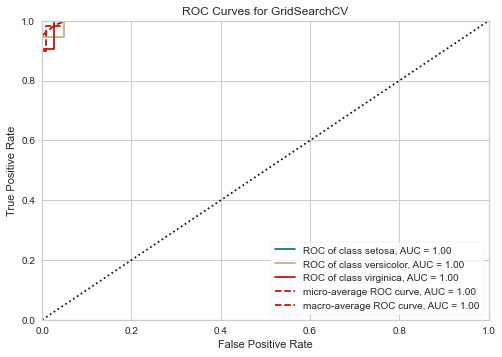

In [56]:
from yellowbrick.classifier import ROCAUC

model = grid_model

visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.show();

# train seti için skorları aldık ve tüm sınıflarımız için 100 de 100 başarı vermiş.

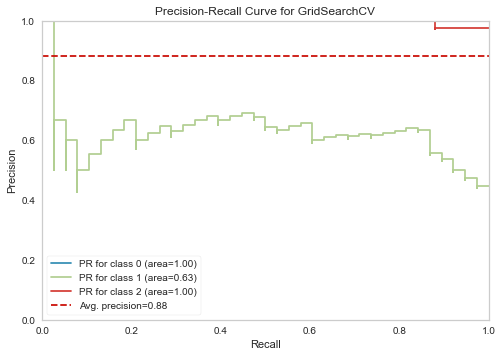

In [57]:
from yellowbrick.classifier import PrecisionRecallCurve

model = grid_model

viz = PrecisionRecallCurve(model, per_class= True)
viz.fit(X_train, y_train)
viz.score(X_train, y_train)
viz.show();

# Dengeli datasetleri için kullanılmaz çünkü skorları hatalı.

### Final model : 

In [58]:
y_pred = grid_model.predict(X_test)

In [59]:
data = pd.concat([X_test, y_test], axis=1)

In [61]:
data["tahmin"] = y_pred
data

,sepal_length,sepal_width,petal_length,petal_width,species,tahmin
33,5.500,4.200,1.400,0.200,setosa,setosa
16,5.400,3.900,1.300,0.400,setosa,setosa
43,5.000,3.500,1.600,0.600,setosa,setosa
129,7.200,3.000,5.800,1.600,virginica,virginica
50,7.000,3.200,4.700,1.400,versicolor,versicolor
123,6.300,2.700,4.900,1.800,virginica,virginica
68,6.200,2.200,4.500,1.500,versicolor,versicolor
53,5.500,2.300,4.000,1.300,versicolor,versicolor
146,6.300,2.500,5.000,1.900,virginica,virginica
1,4.900,3.000,1.400,0.200,setosa,setosa
